In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import math
rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
df= pd.read_table("F:/text/test/data_amazon.xlsx - Sheet1.csv", delimiter=",")
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [2]:
df.shape

(49338, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45373 non-null  object 
 1   Review        48509 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


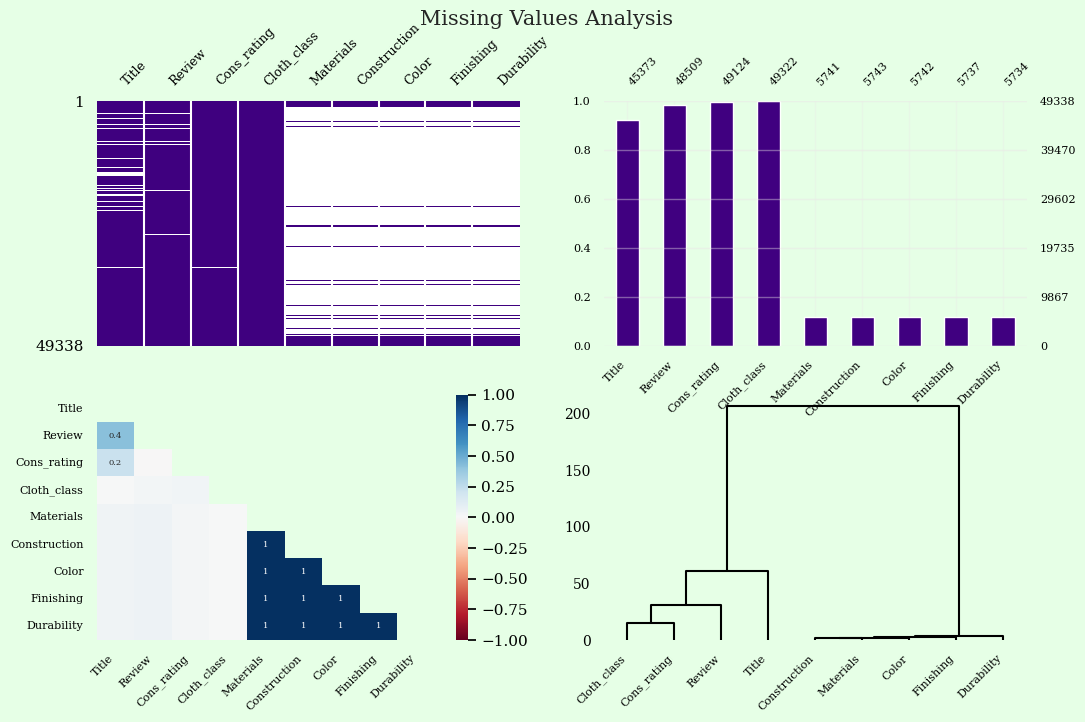

In [4]:
import missingno as msno
# 缺失值分析
fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')
 
fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)
# plt.savefig('missing_values_analysis.png') # 保存图片
plt.show()

In [5]:
df.fillna(0, inplace=True)  # 使用0填充缺失值
df = df.drop_duplicates()  # 剔除重复值
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48217 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         48217 non-null  object 
 1   Review        48217 non-null  object 
 2   Cons_rating   48217 non-null  float64
 3   Cloth_class   48217 non-null  object 
 4   Materials     48217 non-null  float64
 5   Construction  48217 non-null  float64
 6   Color         48217 non-null  float64
 7   Finishing     48217 non-null  float64
 8   Durability    48217 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


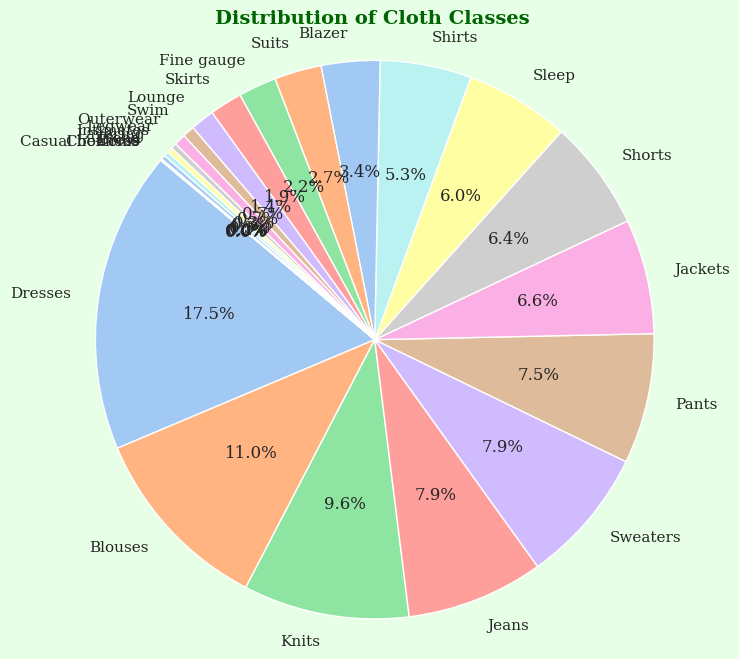

In [6]:
# 计算每个布料类别的出现频率
cloth_class_counts = df['Cloth_class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cloth_class_counts, labels=cloth_class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cloth Classes', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.axis('equal')  
plt.savefig('Distribution of Cloth Classes.png')
plt.show()

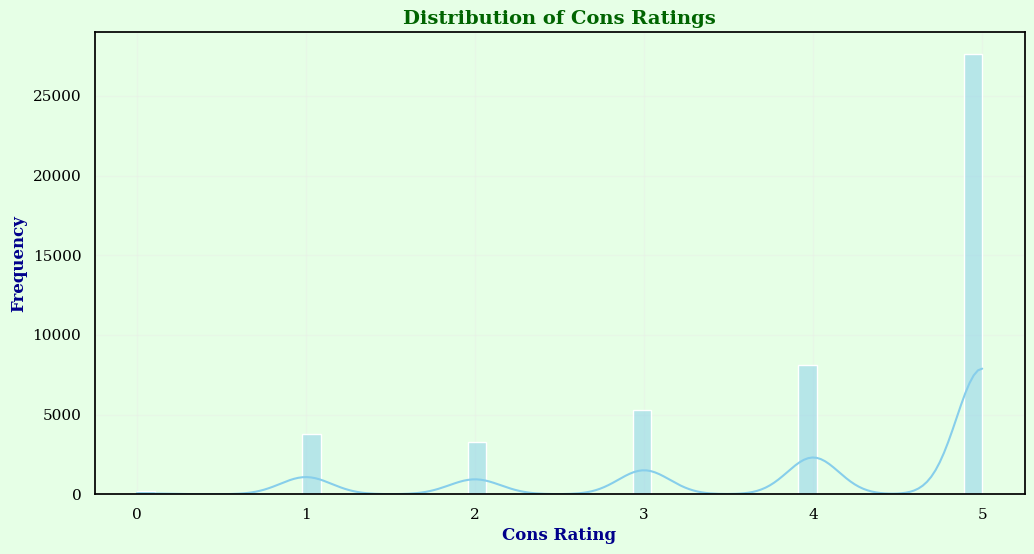

In [7]:
# 评级的分布
plt.figure(figsize=(12, 6))
sns.histplot(df['Cons_rating'], kde=True, color='skyblue')
plt.title('Distribution of Cons Ratings', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Cons Rating', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Con Ratings.png')
plt.show()

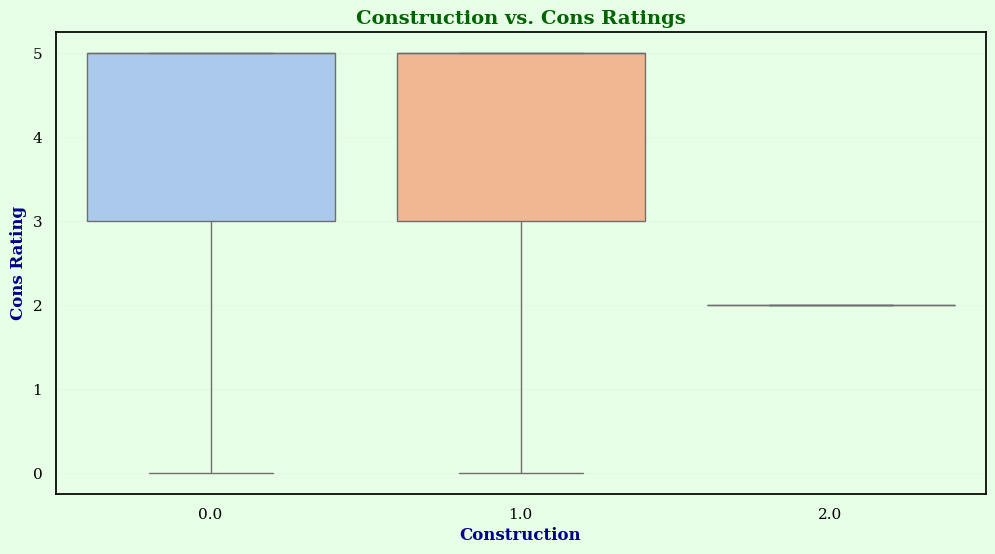

In [8]:
# 优点与缺点评分
plt.figure(figsize=(12, 6))
sns.boxplot(x='Construction', y='Cons_rating', data=df, palette='pastel')
plt.title('Construction vs. Cons Ratings', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Construction', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Cons Rating', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Construction vs. Cons Ratings.png')
plt.show()

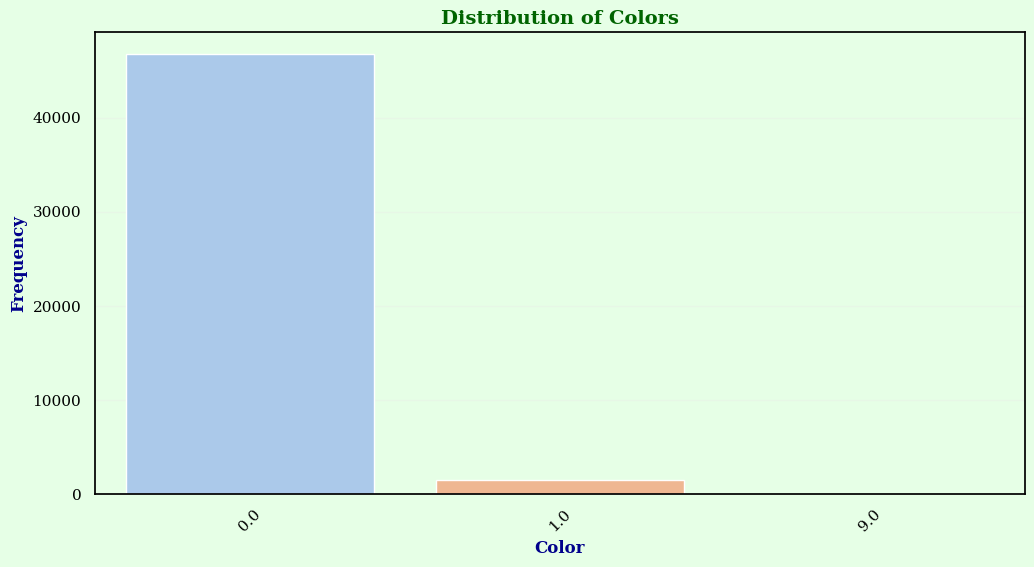

In [9]:
# 颜色分布
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=df, palette='pastel')
plt.title('Distribution of Colors', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Color', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Distribution of Colors.png')
plt.show()

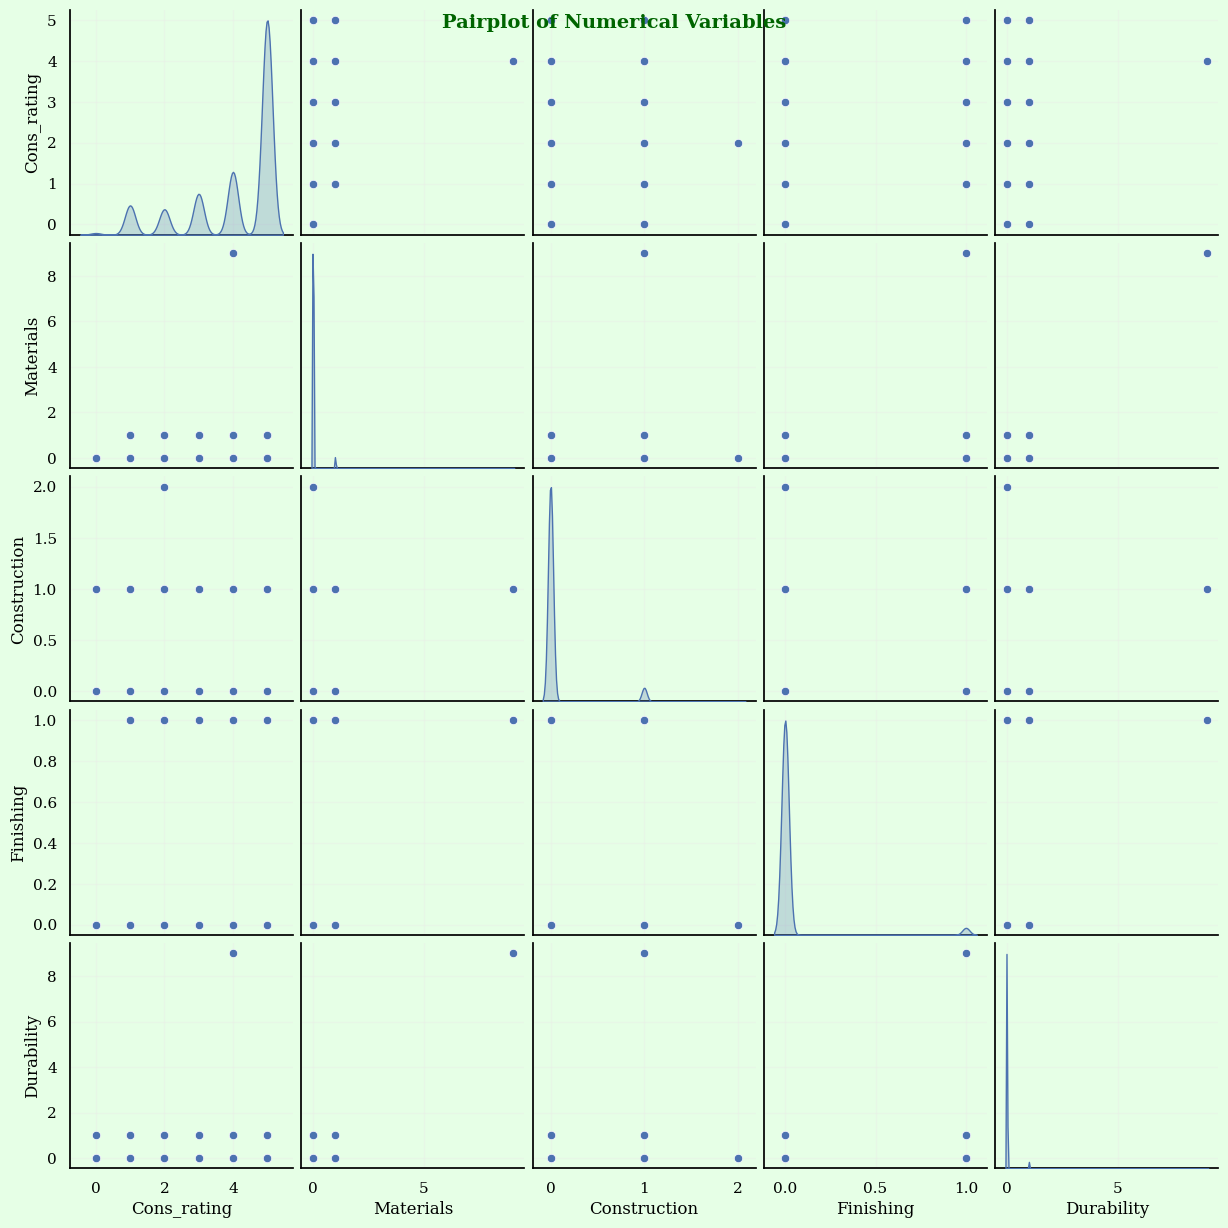

In [10]:
sns.pairplot(df[['Cons_rating', 'Materials', 'Construction', 'Finishing', 'Durability']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Pairplot of Numerical Variables.png')
plt.show()

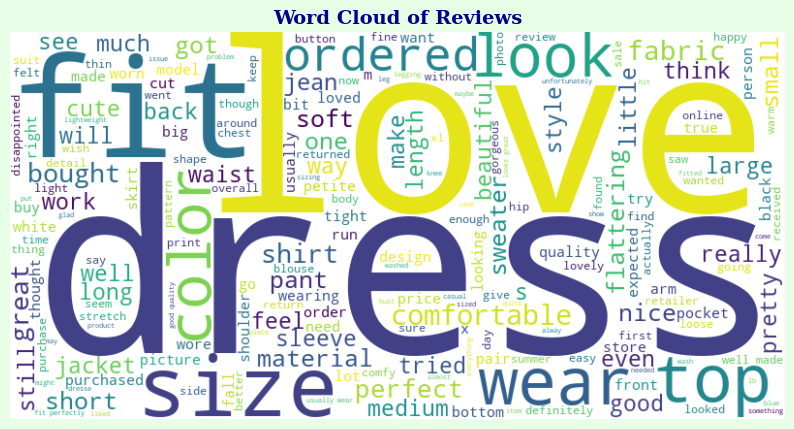

In [12]:
df['Review'] = df['Review'].astype(str)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.axis('off')
# plt.savefig('Word Cloud of Reviews.png') 保存图片
plt.show()

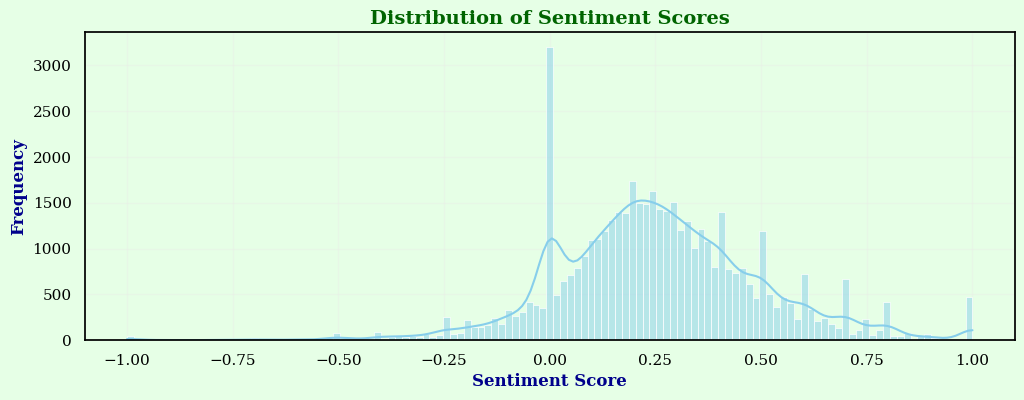

In [14]:
from textblob import TextBlob
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(12, 4))
sns.histplot(df['Sentiment'], kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Sentiment Score', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
# plt.savefig('Distribution of Sentiment Scores.png')
plt.show()

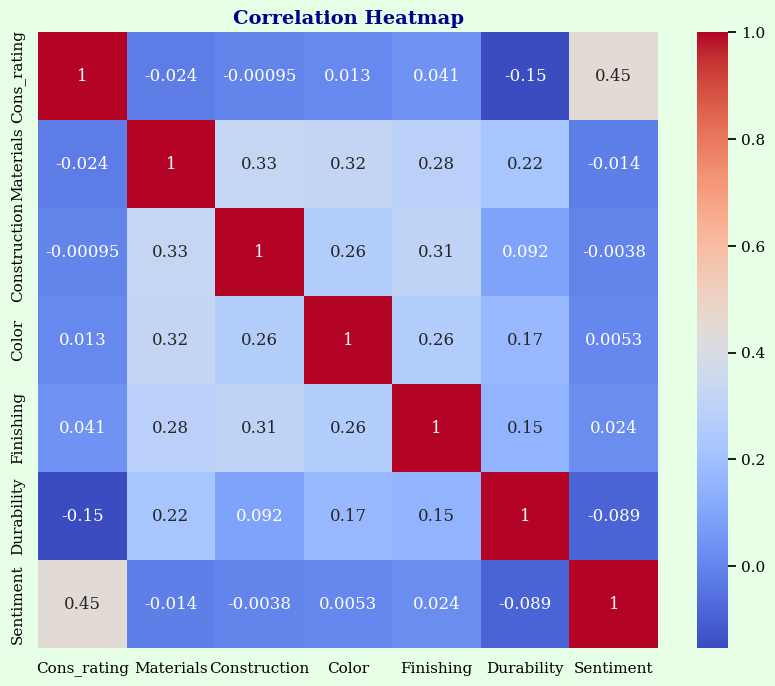

In [15]:
# 删除非数字列
df_numeric = df.drop(columns=['Title', 'Review', 'Cloth_class'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.savefig('Correlation Heatmap.png')
plt.show()

In [16]:
X = df.drop(columns=['Cons_rating', 'Title', 'Review', 'Cloth_class'])
y = df['Cons_rating']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
 
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Sentiment       0.913644
Durability      0.024445
Construction    0.021024
Materials       0.014317
Color           0.013856
Finishing       0.012714
dtype: float64


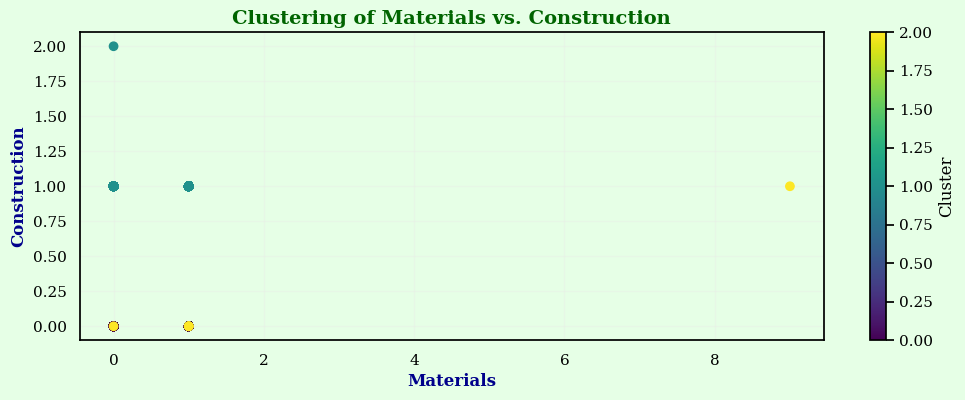

Cluster Counts:
0    44258
1     2981
2      978
Name: Cluster, dtype: int64


In [17]:
from sklearn.cluster import KMeans
X_cluster = df[['Materials', 'Construction', 'Color', 'Finishing', 'Durability']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_cluster)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(12, 4))
plt.scatter(X_cluster['Materials'], X_cluster['Construction'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Materials', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Construction', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Clustering of Materials vs. Construction', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.colorbar(label='Cluster')
plt.savefig('Clustering of Materials vs. Construction.png')
plt.show()
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
 
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_nlp = vectorizer.fit_transform(df['Review'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(X_nlp)
 
# 找出每个主题的关键词
feature_names = vectorizer.get_feature_names_out()
top_words = []
 
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words.append([feature_names[i] for i in top_words_idx])
 
# 打印出每个主题的关键词
for i, words in enumerate(top_words):
    print(f"Topic {i+1}:")
    print(", ".join(words))

Topic 1:
dress, size, small, like, just, love, fabric, fit, large, ordered
Topic 2:
color, sweater, good, jacket, like, great, shirt, quality, nice, fit
Topic 3:
fit, like, size, pants, just, waist, ordered, quality, don, good
Topic 4:
love, comfortable, dress, great, wear, jeans, perfect, soft, fit, flattering
Topic 5:
size, fit, perfect, fits, great, wear, perfectly, bought, long, comfortable
